## Exploring Global Video Game Sales

**Melek, Amisha & Ariel**

### Part I: Data Cleaning and Preparation

**Step 1:Load the dataset and inspect its structure.**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# Loading the dataset 
df = pd.read_csv('vgsales.csv')

In [130]:
# Displaying the first few rows
print("\n First 5 rows of the dataset:")
print(df.head())


 First 5 rows of the dataset:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [131]:
# Displaying the dataset information
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [132]:
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [133]:
# Displaying the shape
print(f"\nDataset shape: {df.shape[0]} rows, {df.shape[1]} columns")


Dataset shape: 16598 rows, 11 columns


**Step 2: Check for missing or inconsistent values.**

In [134]:
# Count missing values per column
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


**Step 3: Handle missing data appropriately; decide whether to impute, drop, or leave as is.**

In [135]:
# --- Before cleaning ---
print("\nMissing values BEFORE cleaning:")
print(df.isnull().sum())


Missing values BEFORE cleaning:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [136]:
#Year is numeric → fill with median
df['Year'] = df['Year'].fillna(df['Year'].median())

In [137]:
#Publisher missing → fill with 'Unknown'
df['Publisher'] = df['Publisher'].fillna("Unknown")

In [138]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [139]:
print("\nMissing values AFTER cleaning:")
print(df.isnull().sum())


Missing values AFTER cleaning:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [140]:
print(f"\nRows after cleaning: {df.shape[0]}")


Rows after cleaning: 16598


**Step 4: Ensure columns have appropriate data types.**

In [141]:
# Convert Year to integer
df['Year'] = df['Year'].astype(int)

In [142]:
# Ensure numeric columns are numeric
numeric_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int32  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


**Step 5: Check for duplicates and remove them**

In [143]:
# Counting duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows found: {duplicates}")



Duplicate rows found: 0


In [144]:
# Removing duplicates
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

###  Part II: EDA

**Descriptive statistics**

In [145]:
print("\nBasic statistics for all numerical columns:")
print(df.describe())


Basic statistics for all numerical columns:
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.416134      0.264667      0.146652      0.077782   
std     4791.853933      5.781686      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.

In [146]:
print("Detailed Sales Statistics:")
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for col in sales_columns:
    print(f"\n{col}:")
    print(f"  Mean:   {df[col].mean():.2f} million")
    print(f"  Median: {df[col].median():.2f} million")
    print(f"  Max:    {df[col].max():.2f} million")
    print(f"  Min:    {df[col].min():.2f} million")


Detailed Sales Statistics:

NA_Sales:
  Mean:   0.26 million
  Median: 0.08 million
  Max:    41.49 million
  Min:    0.00 million

EU_Sales:
  Mean:   0.15 million
  Median: 0.02 million
  Max:    29.02 million
  Min:    0.00 million

JP_Sales:
  Mean:   0.08 million
  Median: 0.00 million
  Max:    10.22 million
  Min:    0.00 million

Other_Sales:
  Mean:   0.05 million
  Median: 0.01 million
  Max:    10.57 million
  Min:    0.00 million

Global_Sales:
  Mean:   0.54 million
  Median: 0.17 million
  Max:    82.74 million
  Min:    0.01 million


In [147]:
# Identifying the top 10 games
top_10 = df.nlargest(10, 'Global_Sales')
print("\nTop 10 Best-Selling Games:")
print(top_10[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']])



Top 10 Best-Selling Games:
                        Name Platform  Year         Genre Publisher  \
0                 Wii Sports      Wii  2006        Sports  Nintendo   
1          Super Mario Bros.      NES  1985      Platform  Nintendo   
2             Mario Kart Wii      Wii  2008        Racing  Nintendo   
3          Wii Sports Resort      Wii  2009        Sports  Nintendo   
4   Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   
5                     Tetris       GB  1989        Puzzle  Nintendo   
6      New Super Mario Bros.       DS  2006      Platform  Nintendo   
7                   Wii Play      Wii  2006          Misc  Nintendo   
8  New Super Mario Bros. Wii      Wii  2009      Platform  Nintendo   
9                  Duck Hunt      NES  1984       Shooter  Nintendo   

   Global_Sales  
0         82.74  
1         40.24  
2         35.82  
3         33.00  
4         31.37  
5         30.26  
6         30.01  
7         29.02  
8         28.62  
9         

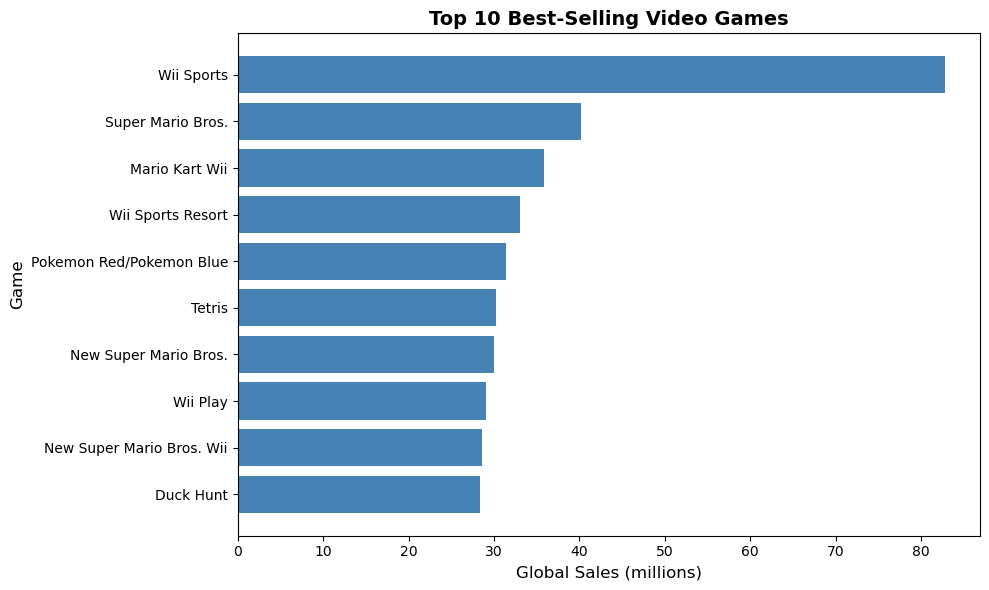

In [148]:
# Visualize top 10 games
plt.figure(figsize=(10, 6))
plt.barh(top_10['Name'], top_10['Global_Sales'], color='steelblue')
plt.xlabel('Global Sales (millions)', fontsize=12)
plt.ylabel('Game', fontsize=12)
plt.title('Top 10 Best-Selling Video Games', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

**Trends over time**

In [149]:
print("\n--- Games Released Per Year ---")
games_per_year = df.groupby('Year').size().reset_index(name='Count')
print(games_per_year)


--- Games Released Per Year ---
    Year  Count
0   1980      9
1   1981     46
2   1982     36
3   1983     17
4   1984     14
5   1985     14
6   1986     21
7   1987     16
8   1988     15
9   1989     17
10  1990     16
11  1991     41
12  1992     43
13  1993     60
14  1994    121
15  1995    219
16  1996    263
17  1997    289
18  1998    379
19  1999    338
20  2000    349
21  2001    482
22  2002    829
23  2003    775
24  2004    763
25  2005    941
26  2006   1008
27  2007   1473
28  2008   1428
29  2009   1431
30  2010   1259
31  2011   1139
32  2012    657
33  2013    546
34  2014    582
35  2015    614
36  2016    344
37  2017      3
38  2020      1


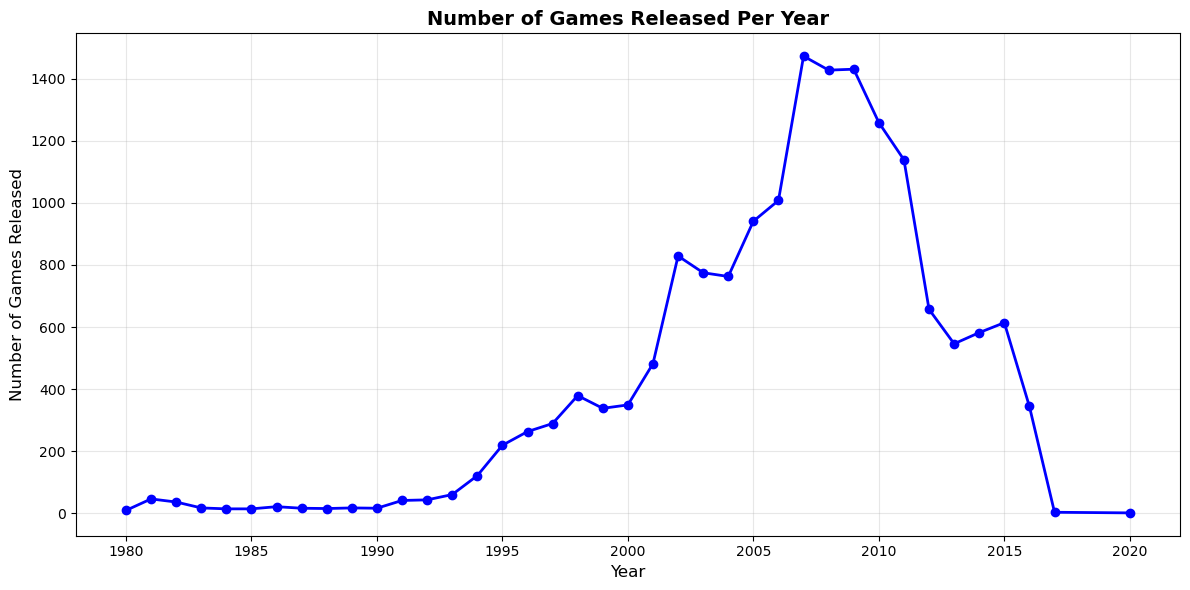

In [150]:
# Visualize games released per year
plt.figure(figsize=(12, 6))
plt.plot(games_per_year['Year'], games_per_year['Count'], 
         marker='o', linewidth=2, color='blue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Games Released', fontsize=12)
plt.title('Number of Games Released Per Year', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [151]:
#Plotting the global sales over time
print("\n--- Global Sales Over Time ---")
sales_per_year = df.groupby('Year')['Global_Sales'].sum().reset_index()
print(sales_per_year)


--- Global Sales Over Time ---
    Year  Global_Sales
0   1980         11.38
1   1981         35.77
2   1982         28.86
3   1983         16.79
4   1984         50.36
5   1985         53.94
6   1986         37.07
7   1987         21.74
8   1988         47.22
9   1989         73.45
10  1990         49.39
11  1991         32.23
12  1992         76.16
13  1993         45.98
14  1994         79.17
15  1995         88.11
16  1996        199.15
17  1997        200.98
18  1998        256.47
19  1999        251.27
20  2000        201.56
21  2001        331.47
22  2002        395.52
23  2003        357.85
24  2004        419.31
25  2005        459.94
26  2006        521.04
27  2007        711.21
28  2008        678.90
29  2009        667.30
30  2010        600.45
31  2011        515.99
32  2012        363.54
33  2013        368.11
34  2014        337.05
35  2015        264.44
36  2016         70.93
37  2017          0.05
38  2020          0.29


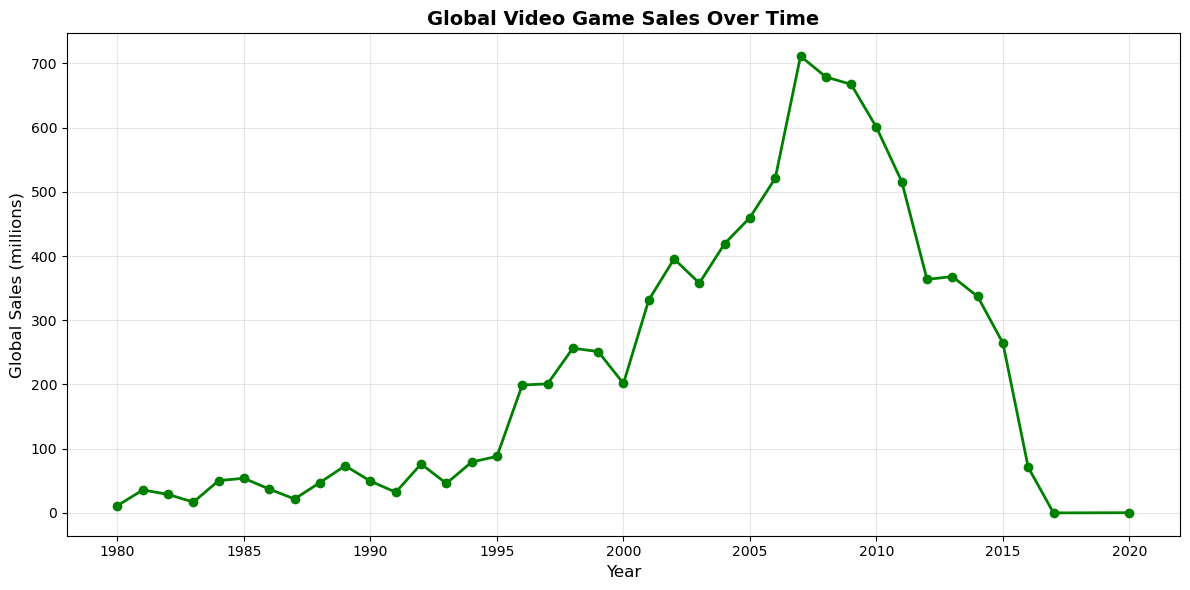

In [152]:
# Visualizing the global sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_per_year['Year'], sales_per_year['Global_Sales'], 
         marker='o', linewidth=2, color='green')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales (millions)', fontsize=12)
plt.title('Global Video Game Sales Over Time', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [153]:
#Analysing if the sales are increasing or decreasing?
print("\nSales Trend Analysis:")
peak_year = sales_per_year.loc[sales_per_year['Global_Sales'].idxmax(), 'Year']
peak_sales = sales_per_year['Global_Sales'].max()
print(f"Peak sales year: {peak_year}")
print(f"Peak sales: {peak_sales:.2f} million")


Sales Trend Analysis:
Peak sales year: 2007
Peak sales: 711.21 million


In [154]:
# Checking the recent trend (last 5 years in data)
recent_years = sales_per_year.tail(5)
if recent_years['Global_Sales'].is_monotonic_decreasing:
    print("Recent trend: DECREASING")
elif recent_years['Global_Sales'].is_monotonic_increasing:
    print("Recent trend: INCREASING")
else:
    print("Recent trend: MIXED")

Recent trend: MIXED


**Genre analysis**

In [155]:
# Genres that are the most in common
print("\n--- Most Common Genres ---")
genre_counts = df['Genre'].value_counts()
print(genre_counts)


--- Most Common Genres ---
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64


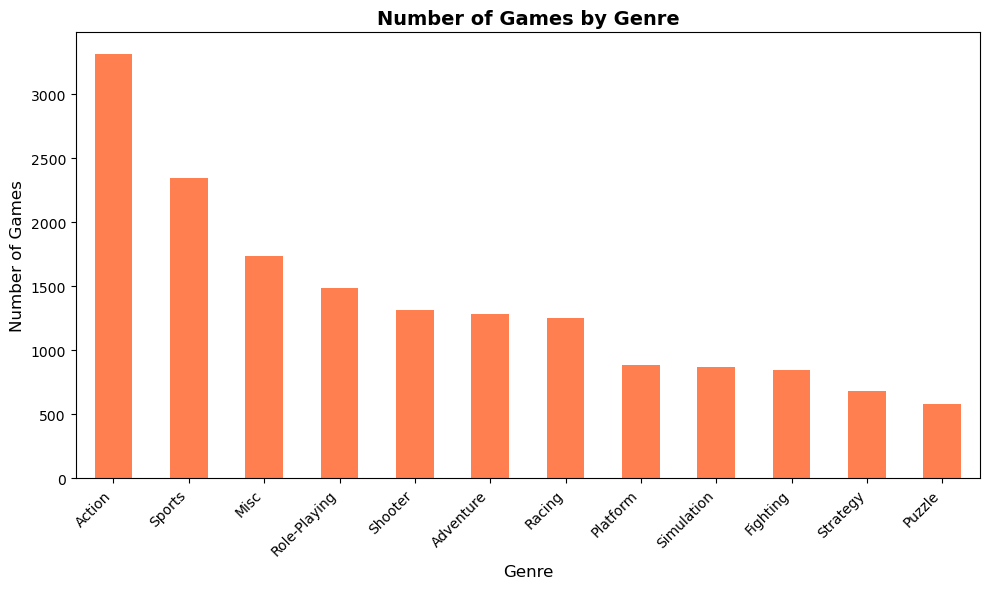

In [156]:
#Visualizing the genre counts
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='coral')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.title('Number of Games by Genre', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [157]:
# Genres that generate the most global sales
print("\n--- Genres by Total Global Sales ---")
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print(genre_sales)


--- Genres by Total Global Sales ---
Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64


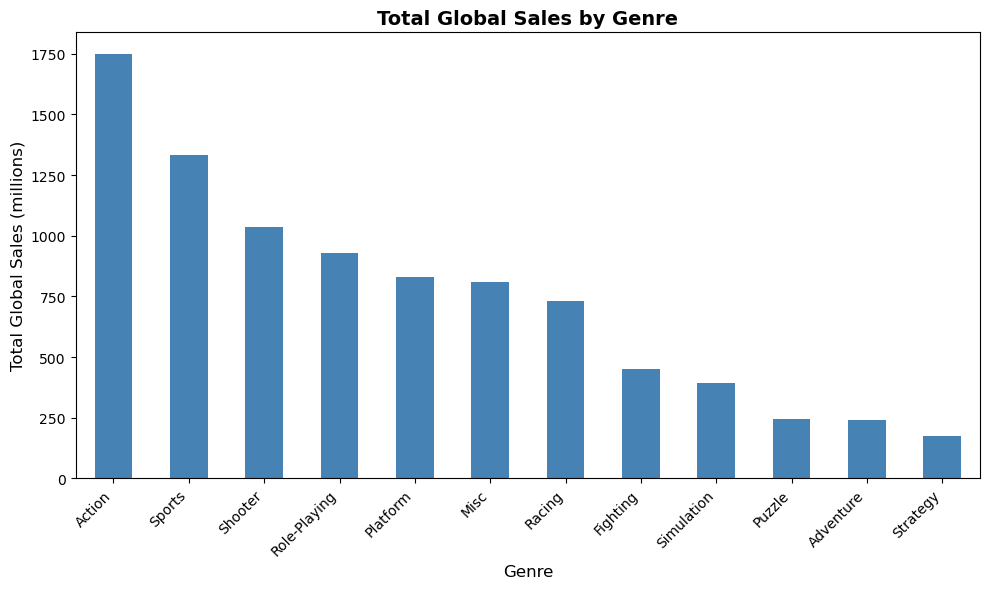

In [158]:
# Visualizing the genre sales
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='steelblue')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Global Sales (millions)', fontsize=12)
plt.title('Total Global Sales by Genre', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [159]:
# Average sales per game by genre
print("\n--- Average Sales Per Game by Genre ---")
avg_sales = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
print(avg_sales.round(2))


--- Average Sales Per Game by Genre ---
Genre
Platform        0.94
Shooter         0.79
Role-Playing    0.62
Racing          0.59
Sports          0.57
Fighting        0.53
Action          0.53
Misc            0.47
Simulation      0.45
Puzzle          0.42
Strategy        0.26
Adventure       0.19
Name: Global_Sales, dtype: float64


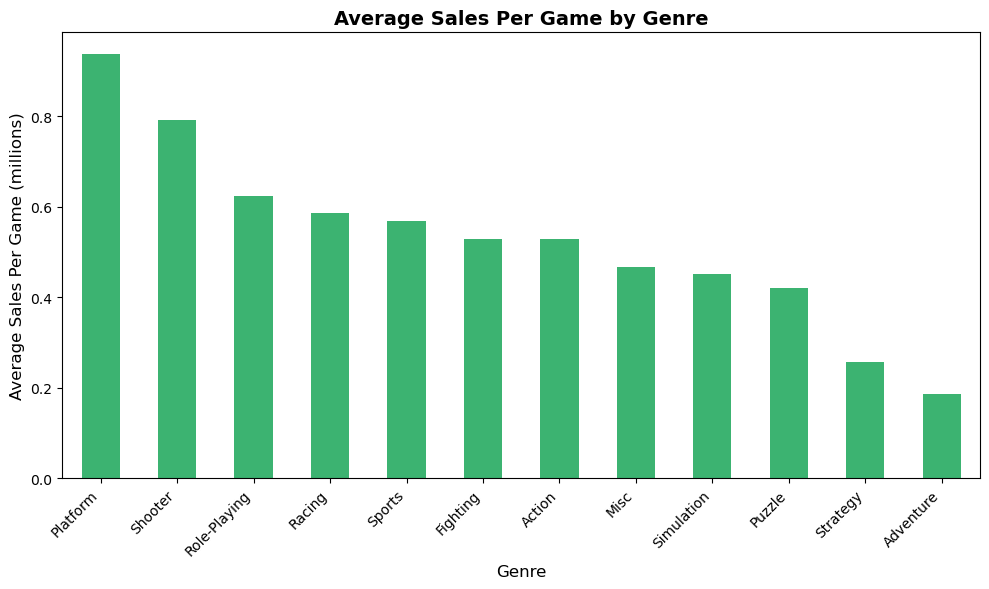

In [160]:
# Visualize average sales
plt.figure(figsize=(10, 6))
avg_sales.plot(kind='bar', color='mediumseagreen')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Sales Per Game (millions)', fontsize=12)
plt.title('Average Sales Per Game by Genre', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()